<hr style="height:10px"> 
 
<div class='container2'>
		<div>
			<img src='https://3.bp.blogspot.com/-n_z36Em56RY/U9pwRro1MwI/AAAAAAABNas/B3G7ht0PZvc/s1600/IMAGEM-PATO+ENGRAVATADO-AZULeditededited1.jpg' ALIGN='left' style='width:10em'>
		</div>	
	<div style='padding: 0 7em 2em 12em;'>
	<h1>Laboratório de Inovação e Automação 1 (LIA 1)</h1>
	<div style="font-size:12pt;float:left;"> 2023/1 | 46M34 | Sala 200 CAE</div><br><br>
    <div style="font-size:12pt;float:left;"><b>Projetos de Inteligência Artificial</b></div>
	</div>
</div>


 <hr style="height:5px"> 

    
<h2>Atividade 2a entrega: Is it a bird?</h2>

Notebook desenvolvido por: <a>Gustavo Mota Barros</a>

 <hr style="height:2px"> 

Instalando as bibliotecas que serao utilizadas em sua versao mais atualizada

In [1]:
!pip install -Uqq fastai
!pip install -Uqq duckduckgo_search

In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *

# Essa funcao retorna uma lista de urls das imagens buscadas
def buscar_imagens(palavra, maximo_imagens=30):
    print(f'Buscando imagens de {palavra}')
    return L(ddg_images(palavra, max_results=maximo_imagens)).itemgot('image')

In [3]:
# Um teste para verificar se os urls estao sendo capturados corretamente
url = buscar_imagens("bird",1)
url

Buscando imagens de bird


(#1) ['http://2.bp.blogspot.com/-g9STQqFQ9Ik/UScse2IifqI/AAAAAAAAA08/mh1immEtVZo/s1600/bluebird.jpg']

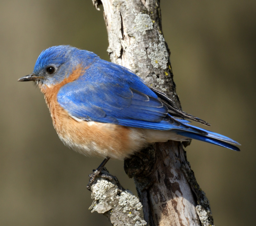

In [7]:
#Verificando a imagem obtida
from fastdownload import download_url

download_url(url[0],"passaro.jpg")

from fastai.vision.all import *

imagem = Image.open("passaro.jpg")
imagem.to_thumb(256,256)

Buscando imagens de forest


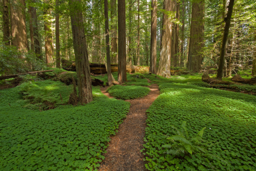

In [10]:
# Podemos verificar a imagem de florestas tambem

novo_url = buscar_imagens("forest",1)
download_url(novo_url[0],"floresta.jpg")

imagem_floresta = Image.open("floresta.jpg")
imagem_floresta.to_thumb(256,256)

Primeiro passo concluido! Ja temos a fonte dos dados. Agora o proximo passo é montar a base de dados para treinar o modelo de reconhecimento.

In [14]:
from time import sleep

itens = {"bird","forest"}
path = Path("bird_or_forest")

for i in itens:
    dest = path/i
    dest.mkdir(parents=True, exist_ok=True)
    download_images(dest,urls=buscar_imagens(f"{i} photo"))
    sleep(10)
    download_images(dest,urls=buscar_imagens(f"{i} sun photo"))
    sleep(10)
    download_images(dest,urls=buscar_imagens(f"{i} shade photo"))
    resize_images(dest, max_size=400, dest=dest)
    

Buscando imagens de bird photo
Buscando imagens de bird sun photo
Buscando imagens de bird shade photo
Buscando imagens de forest photo
Buscando imagens de forest sun photo
Buscando imagens de forest shade photo


In [15]:
# Verificando e removendo arquivos que falharam no download
falharam = verify_images(get_image_files(path))
#removendo
falharam.map(Path.unlink)
falharam

(#2) [Path('bird_or_forest/bird/6273702b-f2db-47e5-97c5-8f9462166ecf.jpg'),Path('bird_or_forest/forest/97cde733-59d0-4370-9135-7f2e6fe71c63.jpg')]

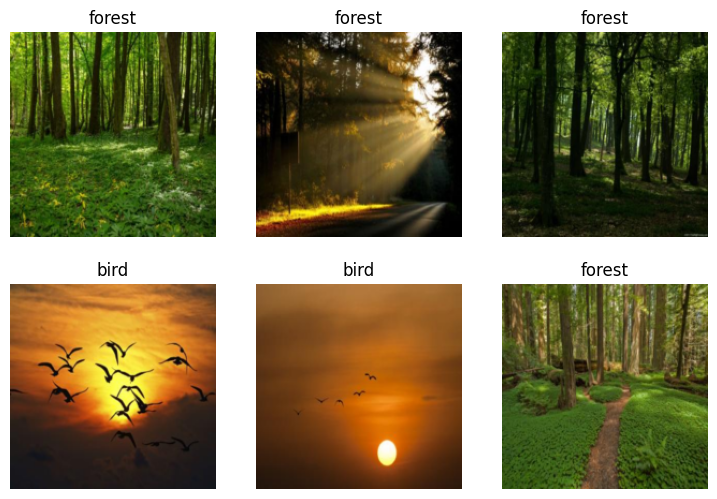

In [17]:
#Criando o data loader --> (Objeto que contem os dados de treinamento e validacao do modelo em desenvolvimento)
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

#Mostrando o batch
dls.show_batch(max_n=6)

In [18]:
# Agora, com os dados devidamente ajustados, basta treinar o modelo

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 203MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.900406,0.646190,0.272727,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.295600,0.145961,0.090909,00:21
1,0.166679,0.118785,0.060606,00:22
2,0.117940,0.114928,0.060606,00:21


Com o modelo ja treinado, podemos o usar para reconhecer se as imagens sao passaros os florestas

In [22]:
is_passaro,_,probabilidade = learn.predict(PILImage.create("floresta.jpg"))
print(f'Isto é: {is_passaro}')
print(f'Probabilidade de ser um passaro --> {probabilidade[0]:4f}')

# probabilidade[0] retorna a probabilidade de ser um passaro
# e probabilidade[1] retorna a probabilidade de ser uma floresta

Isto é: forest
Probabilidade de ser um passaro --> 0.000040
